# Mini Batch Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [2]:
# Create a dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=20, noise=10, random_state=1)

# Normalisation
u = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - u) / std

In [3]:
# Add a column of 1s for Vectorization

ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

print(X.shape, y.shape)

(10000, 21) (10000,)


In [6]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    e = np.sum((y_ - y)**2)
    return e / m

def gradient(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))
    return grad/m

def R2_score(y_, y):
    num = np.sum((y - y_)**2)
    den = np.sum((y - y.mean())**2)
    score = (1 - num/den)
    return score*100

In [41]:
def batch_gradient_descent(X, y, lr=0.01, max_iter=100):
        
    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iter):
        error_list.append(error(X, y, theta))
        
        # Batch Gradient Descent
        grad = gradient(X, y, theta)
        theta = theta - lr * grad
    
    y_ = hypothesis(X, theta)
    print("R2 Score: ", R2_score(y_, y))
    
    return theta, error_list

In [45]:
def mini_batch_gradient_descent(X, y, lr=0.01, max_iter=100, batch_size=200):
   
    
    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    data = np.hstack((X,y.reshape(-1, 1)))
    m = data.shape[0]
    total_batches = m // batch_size
    
    for i in range(max_iter):
        
        # Mini Batch Gradient Descent
        np.random.shuffle(data)

        
        for batch in range(total_batches):
            batch_data = data[batch*batch_size : (batch+1)*batch_size]
            X_batch = batch_data[:, :-1]
            y_batch = batch_data[:, -1]
            
            batch_gradient = gradient(X_batch, y_batch, theta)
            theta = theta - lr * batch_gradient
            
        error_list.append(error(X, y, theta))
            
    
    y_ = hypothesis(X, theta)
    print("R2 Score: ", R2_score(y_, y))
    
    return theta, error_list

In [46]:
theta, error_list = batch_gradient_descent(X, y)
theta2, error_list2 = mini_batch_gradient_descent(X, y)

R2 Score:  86.5794985560494
R2 Score:  99.84797862792519


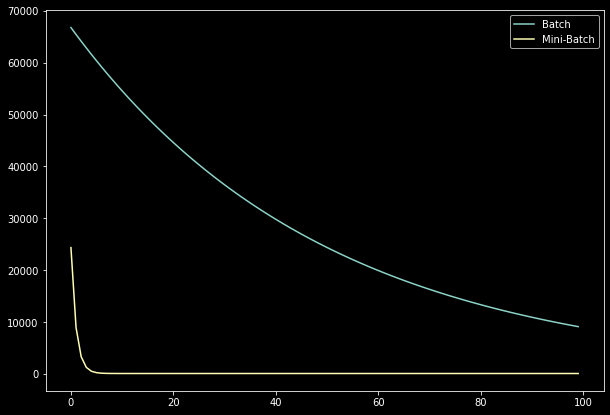

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(error_list)
plt.plot(error_list2)
plt.legend(["Batch", "Mini-Batch"], loc ="upper right")
plt.show()